In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Step 1: Load the Data

In [44]:
# df = pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
df = pd.read_csv("Student_performance_10k.csv")
df.head()
                 

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


## Step 2: Understand the Data

In [45]:
print("(rows, columns) of the dataset: ",df.shape)
print("Column Names: ",*df.columns,sep='\n')

(rows, columns) of the dataset:  (10000, 12)
Column Names: 
roll_no
gender
race_ethnicity
parental_level_of_education
lunch
test_preparation_course
math_score
reading_score
writing_score
science_score
total_score
grade


In [46]:
print("Using info(): ")
df.info()

Using info(): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [47]:
print("Using describe(): ")
df.describe()

Using describe(): 


,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


## Step 3: Identify Missing Values

In [48]:
print("Count of missing values: ", df.isnull().sum(), sep="\n")

Count of missing values: 
roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


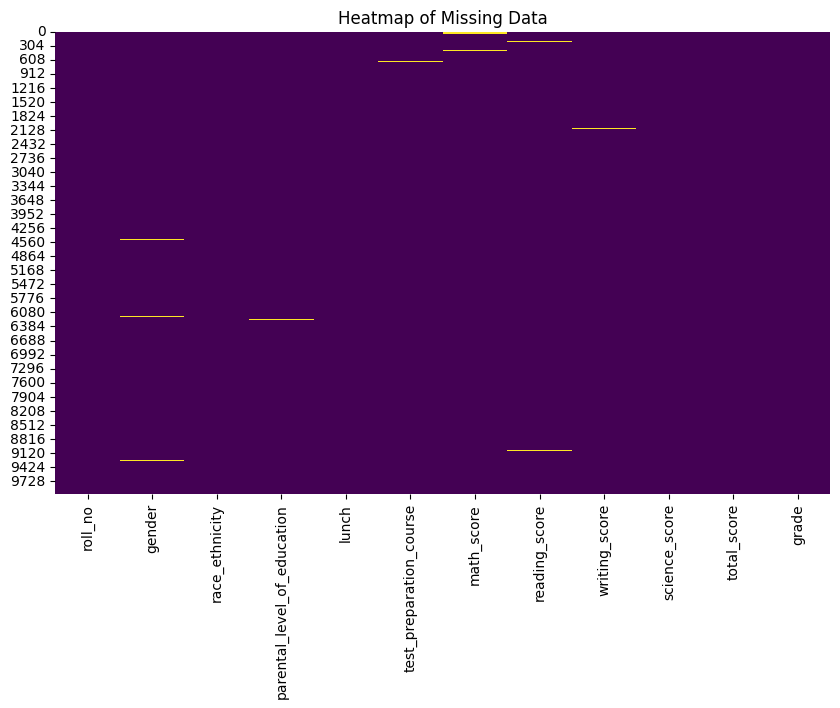

In [49]:

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data")
plt.show()


## Step 4: Handle Duplicatesd.

In [50]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("\nDuplicates dropped.")
else:
    print("\nNo duplicates found.")
print("\nCleaned Data:\n", df)


Number of duplicate rows: 0

No duplicates found.

Cleaned Data:
         roll_no  gender race_ethnicity parental_level_of_education  lunch  \
0        std-01    male        group D                some college    1.0   
1        std-02    male        group B                 high school    1.0   
2        std-03    male        group C             master's degree    1.0   
3        std-04    male        group D                some college    1.0   
4        std-05    male        group C                some college    0.0   
...         ...     ...            ...                         ...    ...   
9995   std-9996  female        group C                some college    1.0   
9996   std-9997  female        group C           bachelor's degree    1.0   
9997   std-9998  female        group B          associate's degree    1.0   
9998   std-9999  female        group B            some high school    1.0   
9999  std-10000  female        group B                 high school    1.0   

      tes

## Step 5: Check for Inconsistent or Faulty Data

In [51]:
# Examine unique values in categorical columns
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'grade']
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", df[col].unique())
# Convert math_score to numeric and handle invalid values
numeric_cols = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check for negative values
for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"\nNegative values found in {col}")



Unique values in gender:
 ['male' nan 'Boy' '\\tmale' 'female' 'Girl']

Unique values in race_ethnicity:
 ['group D' 'group B' 'group C' 'group E' 'group A' 'A' nan 'C' 'D'
 'group C\\n' 'B' 'E']

Unique values in parental_level_of_education:
 ['some college' 'high school' "master's degree" "associate's degree" nan
 'some high school' "bachelor's degree"]

Unique values in grade:
 ['C' 'A' 'B' 'D' nan 'Fail']


## Step 6: Drop Irrelevant Columns

In [52]:
# Drop roll_no because irrelevant
df.drop(columns=['roll_no'], inplace=True)

## Step 7: Convert Data Types

In [53]:
# Convert categorical columns to 'category' type
df[categorical_cols] = df[categorical_cols].astype('category')

# Ensure numeric columns are of type float or int
df[numeric_cols] = df[numeric_cols].astype(float)
print("\nData types updated.")



Data types updated.


## Step 8: Explore Distributions


Value counts for gender:
 gender
female    4983
male      4982
Girl        10
Boy          6
\tmale       1
Name: count, dtype: int64

Value counts for race_ethnicity:
 race_ethnicity
group C      2921
group D      2566
group B      1899
group E      1509
group A      1062
D               6
E               4
group C\n       4
C               3
A               2
B               1
Name: count, dtype: int64

Value counts for parental_level_of_education:
 parental_level_of_education
some college          2272
high school           1987
associate's degree    1905
some high school      1742
bachelor's degree     1361
master's degree        711
Name: count, dtype: int64

Value counts for grade:
 grade
B       5659
C       2701
A        904
D        671
Fail      62
Name: count, dtype: int64


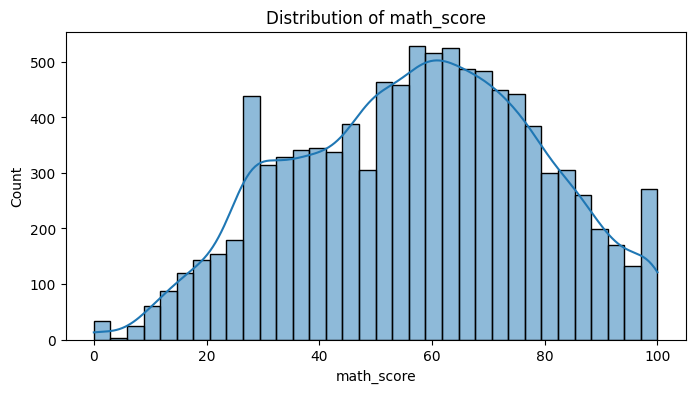

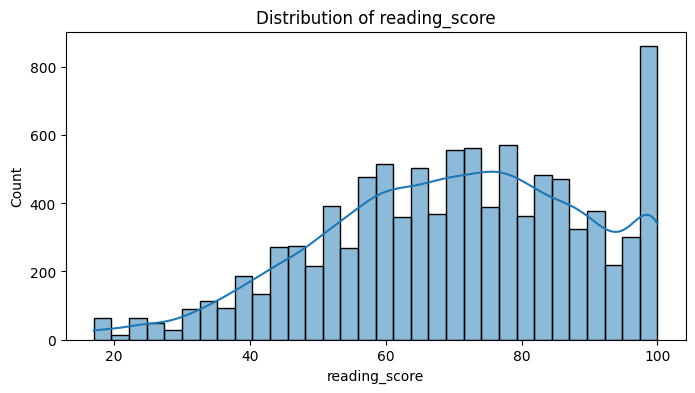

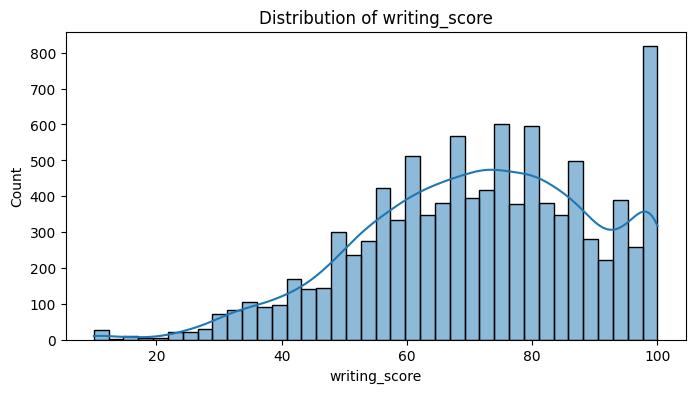

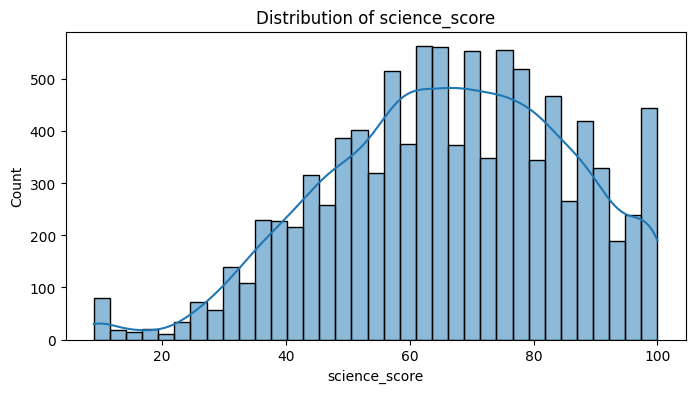

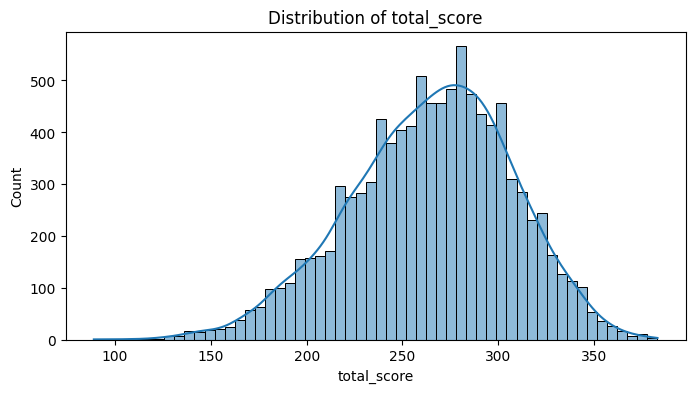

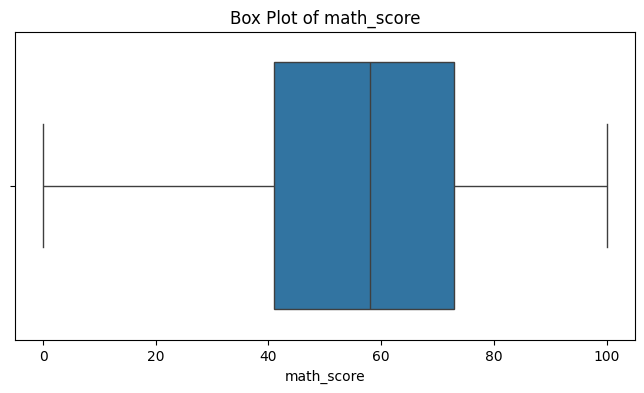

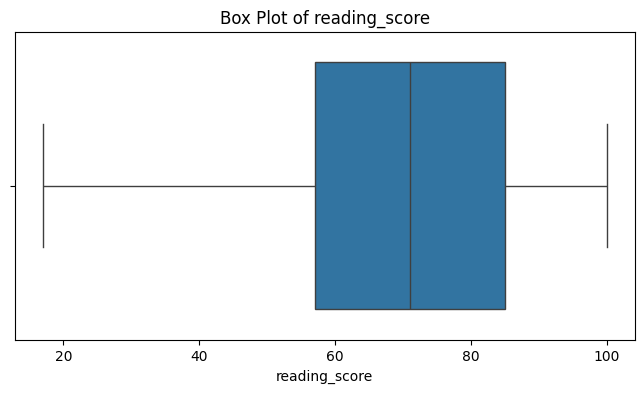

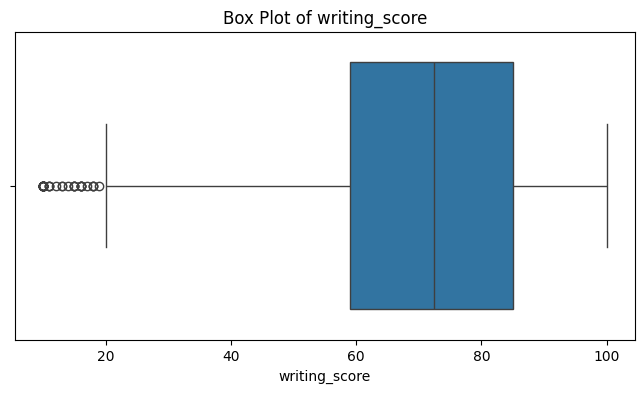

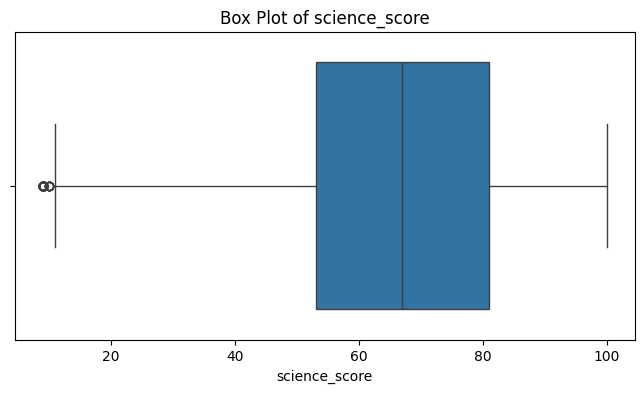

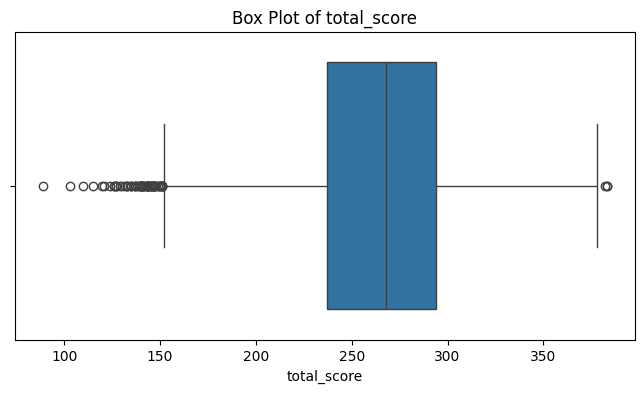

In [54]:
# Check distribution of categorical variables
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
# Detect outliers using box plots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


## Step 9: Handle Outliers


In [55]:
# Use IQR to remove outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


## Step 10: Encode Categorical Variables


In [56]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nData after encoding:\n", df_encoded.head())



Data after encoding:
    lunch  test_preparation_course  math_score  reading_score  writing_score  \
0    1.0                      1.0        89.0           38.0           85.0   
1    1.0                      0.0        65.0          100.0           67.0   
2    1.0                      0.0        10.0           99.0           97.0   
3    1.0                      1.0        22.0           51.0           41.0   
4    0.0                      1.0        26.0           58.0           64.0   

   science_score  total_score  gender_Girl  gender_\tmale  gender_female  ...  \
0           26.0        238.0        False          False          False  ...   
1           96.0        328.0        False          False          False  ...   
2           58.0        264.0        False          False          False  ...   
3           84.0        198.0        False          False          False  ...   
4           65.0        213.0        False          False          False  ...   

   race_ethnici

## Step 11: Correlation Analysis


In [57]:
# Correlation matrix

# Select only numeric columns for correlation matrix
df_encoded = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_encoded.corr()

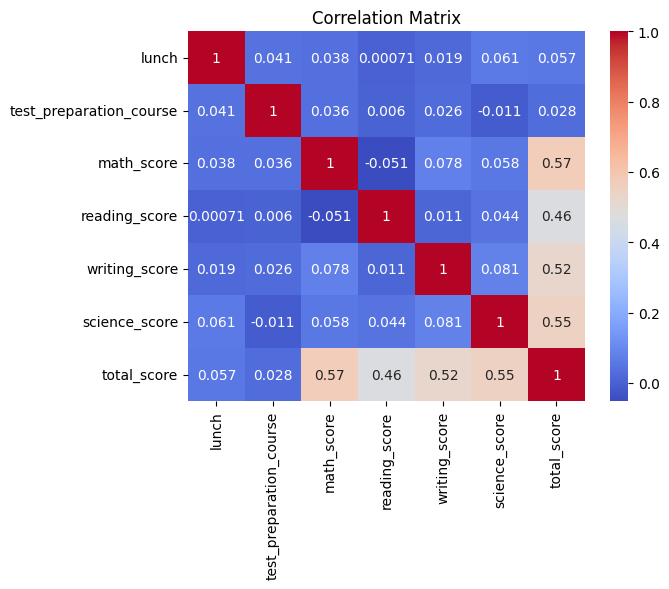

In [58]:

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Step 12: Investigate Relationships


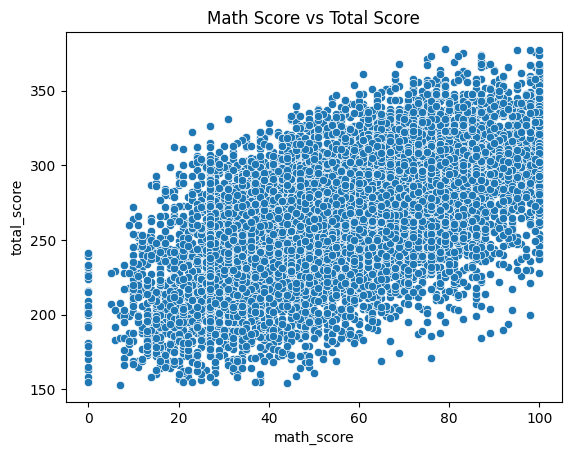

In [59]:
# Compare math_score vs total_score
sns.scatterplot(x=df['math_score'], y=df['total_score'])
plt.title("Math Score vs Total Score")
plt.show()


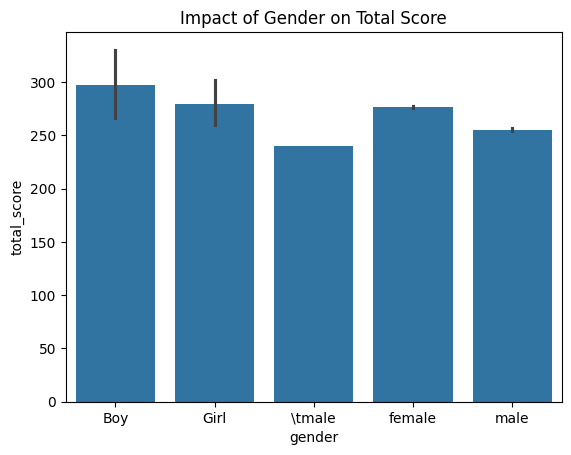

In [60]:
# Analyze impact of gender on total_score
sns.barplot(x='gender', y='total_score', data=df)
plt.title("Impact of Gender on Total Score")
plt.show()


## Step 13: Feature Engineering


In [61]:
# Add a performance ratio column
max_score = 400  # Adjust if needed
df['performance_ratio'] = df['total_score'] / max_score
# Bin total_score into categories
df['performance_level'] = pd.cut(df['total_score'], bins=[0, 200, 300, 400], 
                                 labels=['Low', 'Medium', 'High'])


## Step 14: Summarize Findings

In [62]:
# Summary statistics
summary_stats = df.describe(include='all')
print("\nSummary Statistics:\n", summary_stats)

# Insights Example
print("\nInsights:")
print("1. Average math_score is:", df['math_score'].mean())
print("2. Gender distribution shows more males.")
print("3. Higher parental education correlates with better scores.")



Summary Statistics:
         gender race_ethnicity parental_level_of_education        lunch  \
count     9701           9697                        9698  9695.000000   
unique       5             11                           6          NaN   
top     female        group C                some college          NaN   
freq      4935           2840                        2205          NaN   
mean       NaN            NaN                         NaN     0.645384   
std        NaN            NaN                         NaN     0.478421   
min        NaN            NaN                         NaN     0.000000   
25%        NaN            NaN                         NaN     0.000000   
50%        NaN            NaN                         NaN     1.000000   
75%        NaN            NaN                         NaN     1.000000   
max        NaN            NaN                         NaN     1.000000   

        test_preparation_course   math_score  reading_score  writing_score  \
count      